![example](images/director_shot.jpeg)

# A Vision for Microsoft Tenné 

**Authors:** Rebecca Frost-Brewer
***

## Overview

This project analyzes current trends in the movie industry to establish a vision for Microsoft's new movie studio, Microsoft Tenné. Descriptive analysis of data from IMDb, Rotten Tomatoes, and..... shows XYZ. MS Tenné can use this analysis to ....


## Business Problem

Microsoft sees many big companies creating original video content and want to establish their own movie studio to compete within the digital content market. 

Questions I will consider:

* What genres are the most successful, both in terms of audience rating and gross earnings?
* Of the top grossing films from 2010-2019, what genres were most represented?
* How significant is the correlation between audience rating and gross earnings?

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

The data for this analysis have come from:

* The Movie Database (with movie information)
* IMDb (with movie information and ratings)
* Box Office Mojo (with gross earnings data)

These data include data related to movie titles, release years, audience ratings, genres, and gross earnings, all of which relate to Microsoft's business problem.

The target variables are gross earnings, genres, and audience ratings - and how these variables inform the others. 

Audience rating and gross earnings are both numeric variables and genres are categorical.

***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

## Data Preparation

To prepare the data for analysis, I needed to combine four individual csv files into one master file. Luckily, since we're dealing with movies and movie titles, I was able to use the titles as the key for joining the dataframes.

For the IMDb files, I did drop the 'original_title', 'runtime_minutes', and 'numvotes' columns as they are not relevant or pertinent to the business questions I am addressing.

For each of the files, I also dropped all rows that had any NaN values. I made this decision because I determined that if a movie was missing any data from these sources, that movie would not be mainstream popular nor would have gross earnings of significance. For the purposes of this analysis, I decided to focus on any movies with an average audience rating 7.0 or greater and with gross earnings greater than $3mil. Movies with NaN values would not meet those conditions, therefore could be dropped without worrying about significantly altering the analysis.

Futher, both IMDb and The Movie Database had a measure of average rating - I created a new variable that took the average of these averages, for one "master" average rating that was used in analysis. That way, the ratings from both sources were incorporated.

Lastly, I modified the gross earnings number by dividing the value by 1mil. Since the gross earnings for the movies I was analyzing are obviously more than just 1mil, I wanted the value to be more readable.

To finalize the data preparation, I created a smaller dataframe of just those movies with an average rating of 7.0 or greater and gross earnings of at least $3mil. For movies with multiple genres, I split each genre individually.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import the data from The Movie Database
tmdb_movies = pd.read_csv("data/zippedData/tmdb.movies.csv.gz", index_col = 0)
# here we specify the index column otherwise we'd have a duplicated index column

# Import the data from IMDb
imdb_title_basics = pd.read_csv("data/zippedData/imdb.title.basics.csv.gz")
imdb_title_ratings = pd.read_csv("data/zippedData/imdb.title.ratings.csv.gz")

# Import the Box Office Mojo data on the gross earnings of movies
movie_gross = pd.read_csv("data/zippedData/bom.movie_gross.csv.gz")

# Join the two IMDb files into one dataframe
imdbreviews = imdb_title_basics.join(imdb_title_ratings.set_index('tconst'),
                                   how = 'inner', on = 'tconst', rsuffix = 'r')

imdbreviews = imdbreviews.drop(columns = ['original_title', 'runtime_minutes', 'numvotes'])
# Based on the documentation from IMDb, the primary title is the more popular title,
# used by the filmmakers on promotional materials whereas the original title is the original title,
# in its original language. I decided to drop the original title since we'll be more familiar with
# the primary title

imdbreviews.rename(columns = {'primary_title':'title'}, inplace = True)
# Change the column name of the movie title to 'title', which will match our additional files

In [3]:
imdbreviws = imdbreviews.dropna(inplace = True)
imdbreviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 146134
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73052 non-null  object 
 1   title          73052 non-null  object 
 2   start_year     73052 non-null  int64  
 3   genres         73052 non-null  object 
 4   averagerating  73052 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [4]:
# From The Movie Database dataframe, we only want the movie title and the vote average.
tmdb_movies = tmdb_movies[['title', 'vote_average']]
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         26517 non-null  object 
 1   vote_average  26517 non-null  float64
dtypes: float64(1), object(1)
memory usage: 621.5+ KB


In [5]:
# From Box Office Mojo, we only want to keep the title and domestic gross earnings for the films
movie_gross = movie_gross[['title', 'domestic_gross']]

In [7]:
movie_gross['gross_mil'] = (movie_gross['domestic_gross'])/1000000

In [8]:
movie_gross = movie_gross[['title', 'gross_mil']]
movie_gross.dropna(inplace = True)
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      3359 non-null   object 
 1   gross_mil  3359 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.7+ KB


<ipython-input-8-123356394134>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_gross.dropna(inplace = True)


In [ ]:
imdbreviews.head()

In [ ]:
tmdb_movies.head()

In [ ]:
movie_gross.head()

In [9]:
moviedf = imdbreviews.merge(tmdb_movies, on = 'title').merge(movie_gross, on = 'title')
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         3259 non-null   object 
 1   title          3259 non-null   object 
 2   start_year     3259 non-null   int64  
 3   genres         3259 non-null   object 
 4   averagerating  3259 non-null   float64
 5   vote_average   3259 non-null   float64
 6   gross_mil      3259 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 203.7+ KB


In [ ]:
moviedf.head()

In [ ]:
moviedf.info()

In [14]:
moviedf['ratingave'] = (moviedf["averagerating"] + moviedf["vote_average"])/2
moviedf = moviedf.drop(columns = ['averagerating', 'vote_average'])
moviedf.head()

,tconst,title,start_year,genres,gross_mil,ratingave
0,tt0315642,Wazir,2016,"Action,Crime,Drama",1.100,6.85
1,tt0337692,On the Road,2012,"Adventure,Drama,Romance",0.744,5.85
2,tt4339118,On the Road,2014,Drama,0.744,5.80
3,tt5647250,On the Road,2016,Drama,0.744,5.65
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",58.200,7.20


In [15]:
moviedf_small = moviedf[(moviedf['ratingave'] >= 7) &
                        (moviedf['gross_mil'] >= 3)]
moviedf_small

,tconst,title,start_year,genres,gross_mil,ratingave
4,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",58.2,7.20
9,tt3079380,Spy,2015,"Action,Comedy,Crime",110.8,7.00
15,tt0398286,Tangled,2010,"Adventure,Animation,Comedy",200.8,7.65
31,tt0435761,Toy Story 3,2010,"Adventure,Animation,Comedy",415.0,8.00
32,tt0443272,Lincoln,2012,"Biography,Drama,History",182.2,7.10
...,...,...,...,...,...,...
3249,tt7745068,My Hero Academia: Two Heroes,2018,"Action,Adventure,Animation",5.8,8.05
3250,tt7775622,Free Solo,2018,"Documentary,Sport",17.5,8.10
3251,tt7784604,Hereditary,2018,"Drama,Horror,Mystery",44.1,7.15
3252,tt7905466,They Shall Not Grow Old,2018,"Documentary,History,War",18.0,8.25


In [16]:
# We want to split the genre column for analysis, so that each genre is on its own
moviedf_small = moviedf_small.assign(genres = moviedf_small['genres'].str.split(',')).explode('genres')
moviedf_small.head()

,tconst,title,start_year,genres,gross_mil,ratingave
4,tt0359950,The Secret Life of Walter Mitty,2013,Adventure,58.2,7.2
4,tt0359950,The Secret Life of Walter Mitty,2013,Comedy,58.2,7.2
4,tt0359950,The Secret Life of Walter Mitty,2013,Drama,58.2,7.2
9,tt3079380,Spy,2015,Action,110.8,7.0
9,tt3079380,Spy,2015,Comedy,110.8,7.0


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

As a reminder of our business questions:
* What genres are the most successful, both in terms of audience rating and gross earnings?
* Of the top grossing films from 2010-2019, what genres were most represented?
* How significant is the correlation between audience rating and gross earnings?

To start exploring the data, I calculated a count of all the movies from each genre. This exercise showed that of the 492 movies in our dataset, 250 were Dramas, followed by Comedy, with 102 movies. In other words, 50 percent of movies that grossed more than $3mil and rated more than 7.0 were dramas; comedies represented 21 percent of the movies.

With this count of genres, I was able to ascertain the average movie rating for each genre - while dramas make up 50 percent of the dataset, dramas rank 12th in average rating! The 16 musical movies and 33 sci-fi movies were the two genres with the highest aggregate average rating, 7.7 and 7.6, respectively.

Next, I calculated the average gross earnings for each genre - and again, while dramas make up 50 percent of the dataset, dramas rank 17th in average gross earnings! The top three genres with the highest average gross earnings are: Sci-Fi ($251mil), Adventure ($215mil), and Action ($207mil).

Lastly, I created a smaller dataframe grouped by year, genre, and gross earnings only of those films that grossed more than $139.7 million (75th quartile and above) and only included the genres of note: Drama, Comedy, Musical, Sci-Fi, Action, Adventure, and Animation. From this smaller dataframe, I created a visualization faceted by year, to see the toppest grossing genres by year to determine if there are any trends we can use in addressing our business problem.


***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [17]:
topratings_genre = (pd.DataFrame(moviedf_small.groupby('genres').title.nunique())).sort_values(
    'title', ascending = False)

topratings_genre

,title
genres,
Drama,250
Comedy,102
Adventure,90
Action,79
Biography,77
Crime,54
Thriller,51
Romance,46
Documentary,37


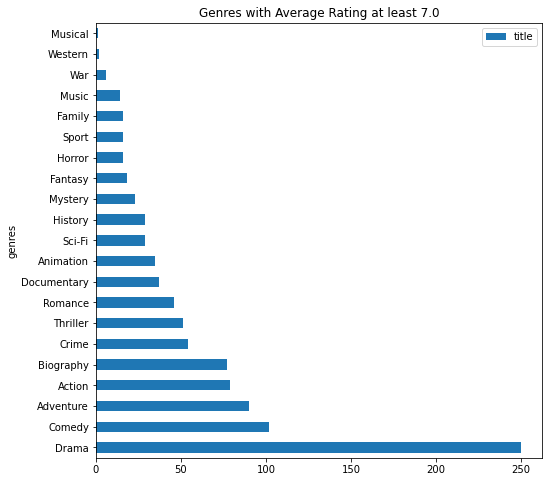

In [18]:
topratings_genre[['title']].plot.barh(
    stacked = True, title = 'Genres with Average Rating at least 7.0', figsize=(8, 8));

In [40]:
genre_ratings = moviedf_small.groupby('genres').ratingave.agg(['count','mean']).sort_values(
    'mean', ascending = False)
genre_ratings[genre_ratings['count'] >= 5]

,count,mean
genres,,
Music,16,7.687500
Sci-Fi,33,7.610606
Animation,44,7.522727
Mystery,28,7.512500
Adventure,104,7.512019
Documentary,41,7.492683
Biography,95,7.484211
Action,91,7.483516
Crime,66,7.481061


In [42]:
topratings_gross = moviedf_small[['title', 'genres', 'gross_mil']]
topratings_gross = topratings_gross.groupby(['genres']).mean()
topratings_gross.sort_values('gross_mil', ascending = False, inplace = True)
topratings_gross

,gross_mil
genres,
Sci-Fi,250.984848
Adventure,214.541346
Action,207.428571
Animation,175.156818
Musical,174.300000
Western,167.000000
Fantasy,149.108696
Family,139.177778
Horror,119.110526


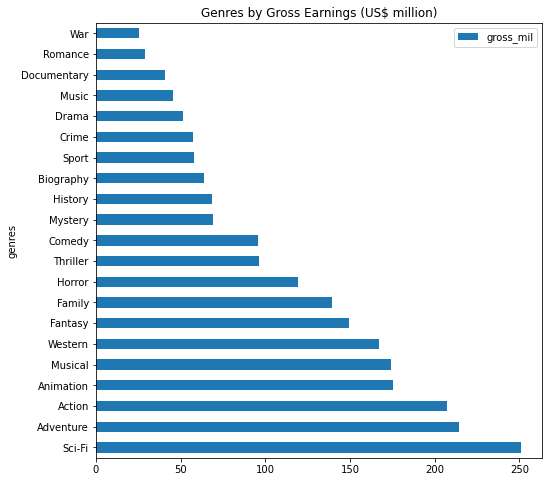

In [20]:
topratings_gross[['gross_mil']].plot.barh(stacked = True,
                                          title = 'Genres by Gross Earnings (US$ million)',
                                          figsize=(8, 8));

In [50]:
topratings_year = moviedf_small[['start_year', 'genres', 'gross_mil']]
topratings_year = topratings_year[(topratings_year['gross_mil'] > 139.7) &
                                 (topratings_year['genres'].isin(['Adventure',
                                                                  'Action',
                                                                  'Comedy',
                                                                  'Sci-Fi',
                                                                  'Drama',
                                                                  'Animation',
                                                                  'Musical']))]

topratings_year

,start_year,genres,gross_mil
15,2010,Adventure,200.8
15,2010,Animation,200.8
15,2010,Comedy,200.8
31,2010,Adventure,415.0
31,2010,Animation,415.0
...,...,...,...
3152,2018,Adventure,201.1
3152,2018,Animation,201.1
3152,2018,Comedy,201.1
3198,2018,Drama,188.0


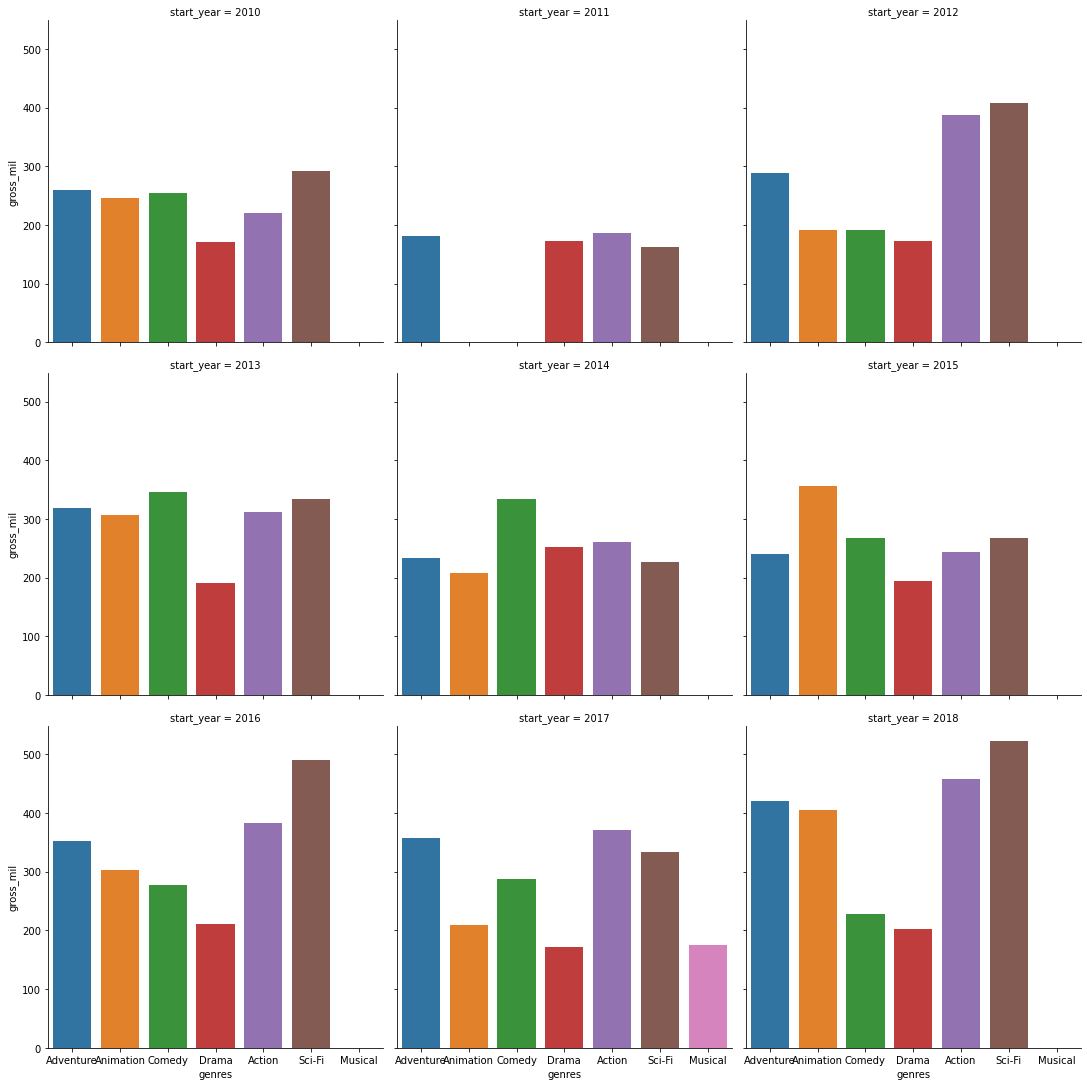

In [49]:
g = sns.catplot(x = "genres", y = "gross_mil",
                col = "start_year",
                data = topratings_year,
                kind = "bar",
                ci = None,
                col_wrap = 3);
g

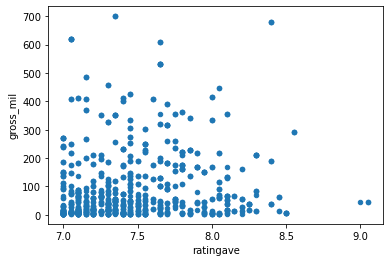

In [43]:
moviedf_small.plot(kind = 'scatter', x = 'ratingave', y = 'gross_mil');

In [ ]:
moviedf_small.corr()

There is a very weak, positive correlation between rating average and gross earnings, with a correlation coefficient of 0.0896

This is a weak, positive correlation rating average and year of movie release, 0.131

In [ ]:
import code.data_preparation as dp

In [ ]:
# Import the visualization package you created

import code.visualizations as viz

In [ ]:
# This example function takes no arguments currently, but you would pass the full dataset to it for your project

viz.sample_plot_1()

In [ ]:
# here you run your code to clean the data
import code.data_cleaning as dc

full_dataset = dc.full_clean()

In [ ]:
# here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***